# An Introduction to ML

In [111]:
import os
import random
import numpy as np
import scipy.optimize as opt
import scipy.stats as stat
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import sklearn as sk
import sklearn.cluster as clust
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from tqdm.notebook import tqdm
import seaborn as sns
sns.set(style="whitegrid", font="FreeSans")
import pyactup as pau

# Example Data

This is Holly's dataset: Elderly adults categorized as HC or MCI, with age, sex, and Speed of Foregetting

In [112]:
data = pd.read_csv("holly.csv")
data

,userId,clinicalStatus,age,sex,sof
0,69409,HC,72,F,0.378611
1,69410,HC,58,F,0.364693
2,69411,MCI,75,M,0.441768
3,69412,MCI,70,M,0.467389
4,69414,HC,72,F,0.334343
5,69415,MCI,67,M,0.435315
6,69417,MCI,73,M,0.391745
7,69418,MCI,70,M,0.398536
8,69419,HC,57,F,0.361850
9,69420,HC,73,M,0.364266


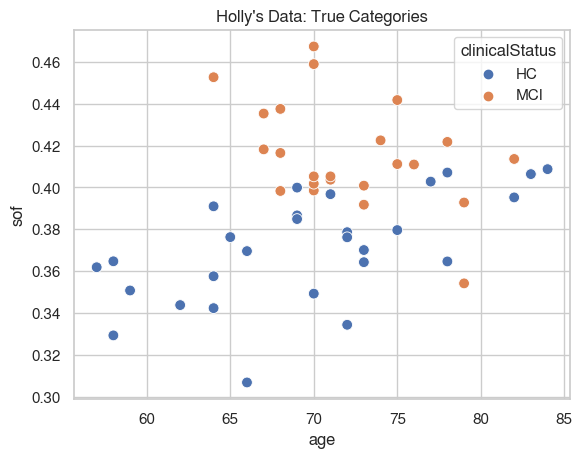

In [113]:
ax = sns.scatterplot(data, x="age", y="sof", hue="clinicalStatus", s=60)
ax.set_title("Holly's Data: True Categories")
plt.show()

# Unsupervised Learning

## Clustering

Suppose we don't know what the true categorize are, can we make an informed guess?

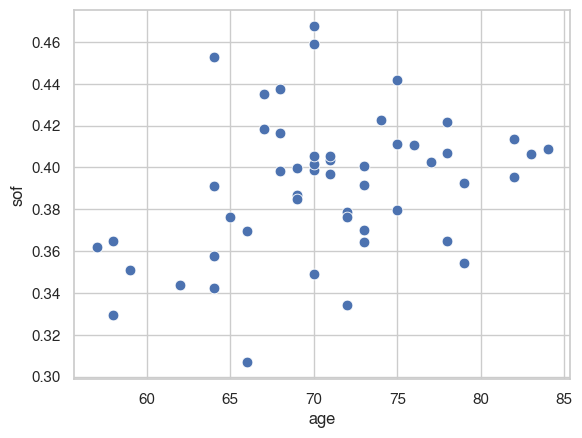

In [114]:
dataX = data[["age","sof"]]
sns.scatterplot(dataX, x="age", y="sof", s=60)
plt.show()

/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


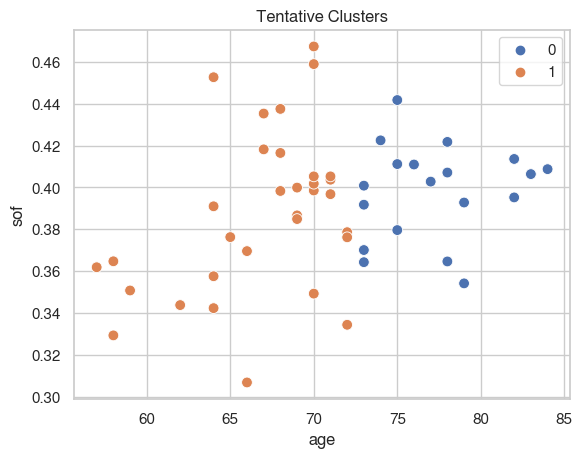

In [115]:
kmeans = clust.KMeans(n_clusters=2).fit(dataX)

ax = sns.scatterplot(dataX, x="age", y="sof", s=60, hue=kmeans.labels_)
ax.set_title("Tentative Clusters")
plt.show()

Unfortunately, not good. Because Age is on a much larger scale, we have to _scale_ and _normalize_ the variables

In [116]:
dataX['age_zscore'] = (dataX.age - dataX.age.mean()) / dataX.age.std(ddof=0)
dataX['sof_zscore'] = (dataX.sof - dataX.sof.mean()) / dataX.sof.std(ddof=0)
dataZ = dataX[['age_zscore','sof_zscore']]
dataX = dataX[['age','sof']]
dataZ

/tmp/ipykernel_10251/1083979225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX['age_zscore'] = (dataX.age - dataX.age.mean()) / dataX.age.std(ddof=0)
/tmp/ipykernel_10251/1083979225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX['sof_zscore'] = (dataX.sof - dataX.sof.mean()) / dataX.sof.std(ddof=0)


,age_zscore,sof_zscore
0,0.196421,-0.382386
1,-1.994898,-0.799591
2,0.665989,1.510666
3,-0.116625,2.278641
4,0.196421,-1.709272
5,-0.586193,1.317241
6,0.352943,0.011291
7,-0.116625,0.214844
8,-2.151420,-0.884803
9,0.352943,-0.812363


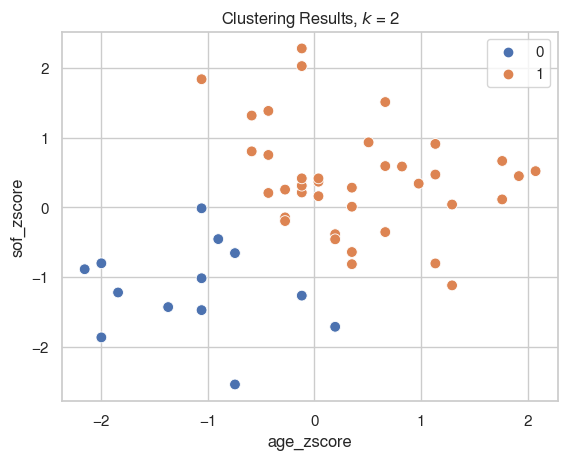

In [117]:
kmeans = clust.KMeans(n_clusters=2, n_init=10).fit(dataZ)
ax = sns.scatterplot(dataZ, x="age_zscore", y="sof_zscore", s=60, hue=kmeans.labels_)
ax.set_title("Clustering Results, $k$ = 2")
plt.show()

Of course, the number of classes we need is arbitrary. What would happen if we had 4, instead of 2 classes?

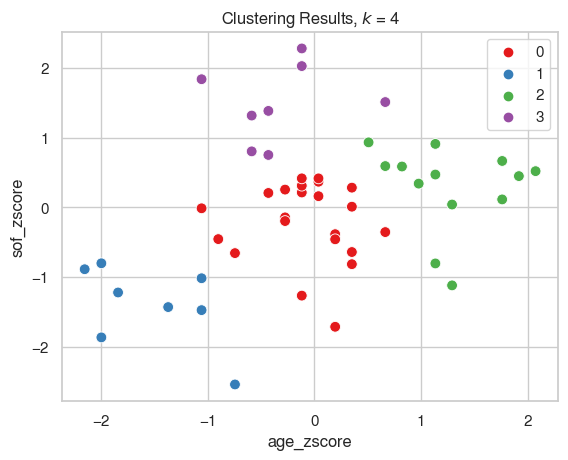

In [118]:
kmeans = clust.KMeans(n_clusters=4, n_init=10).fit(dataZ)
kmeans.labels_

ax = sns.scatterplot(dataZ, x="age_zscore", y="sof_zscore", s=60, hue=kmeans.labels_, palette="Set1")
ax.set_title("Clustering Results, $k$ = 4")
plt.show()

## Evaluating Clusters: The Elbow Method

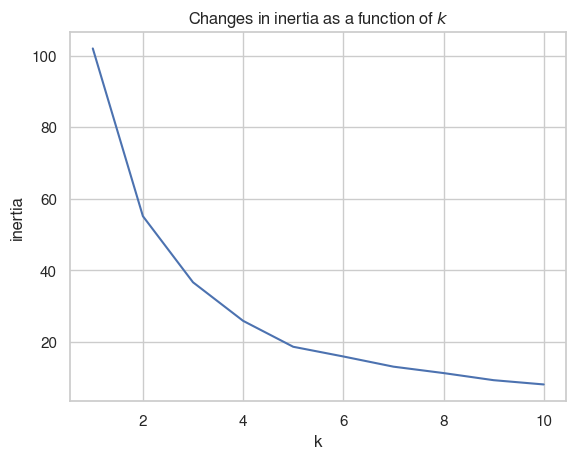

In [121]:
inertias = []
ks = range(1, 11)
for k in ks:
    kmeans = clust.KMeans(n_clusters=k, n_init=10).fit(dataZ)
    inertias.append(kmeans.inertia_)
res = pd.DataFrame(np.array([ks, inertias]).T, columns=['k', 'inertia'])
ax=sns.lineplot(res, x="k", y='inertia')
ax.set_title("Changes in inertia as a function of $k$")
plt.show()

# Supervised Learning

## Classification with _k_-Nearest Neighbor

In [ ]:
newobs = [66, 0.40]
x, y = newobs
ax=sns.scatterplot(data, x="age", y="sof", s=60, hue="clinicalStatus")
ax.plot(x, y, "o", color="cyan")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
point = np.array([newobs]).reshape((1,2))
dataX = data[["age","sof"]]
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(dataX, data.clinicalStatus)
knn.predict(point)

## Linear Regression

In [ ]:
classes = [0 if x == "HC" else 1 for x in data.clinicalStatus ]
ax=sns.scatterplot(data, y="clinicalStatus", x="sof", s=60, hue="clinicalStatus")
plt.show()

first, we need to transform categorical variables as numbers

In [ ]:
lm = sk.linear_model.LinearRegression()
lm.fit(dataX[['sof']], classes)
data['class'] = classes
ax=sns.scatterplot(data, y="class", x="sof", s=60, hue="clinicalStatus")
b0 = lm.intercept_
b1 = lm.coef_[0]
x = np.linspace(0.3, 0.5)
pred = b0 + b1 * x
ax.plot(x, pred)
ax.set_title("Linear Regression")
plt.show()

## Logistic Regression

In [ ]:
logm = sk.linear_model.LogisticRegression(penalty="none", fit_intercept=True, max_iter=1000)
logm.fit(data[['sof']], data[['class']])

# Create predictions for arbitrary values
newx = pd.DataFrame(np.linspace(0.3, 0.5), columns=['sof'])
newy = logm.predict_proba(newx)

ax=sns.scatterplot(data, y="class", x="sof", s=60, hue="clinicalStatus")
ax.plot(newx, newy[:,1])
score = logm.score(data[['sof']], classes)
ax.set_title("Logistic Regression")

# Cross Validation